In [ ]:
import os
import pandas as pd

In [ ]:
fns = os.listdir('../processed_data/adj_expression/')

In [22]:
for i, f in enumerate(fns):
    df_exp = pd.read_csv('../processed_data/adj_expression/' + f, index_col=0, nrows = 5)
    if i == 0:
        s0 = set(map(str, df_exp.columns))
    else:
        s0 = s0 & set(map(str, df_exp.columns))
s0 = set([s.split('.')[0] for s in s0])

In [ ]:
#!/usr/bin/env python
import pandas
import sqlite3

connection = sqlite3.connect("../data/gwas_g2p/metaxcan_results_v1.5.db")

In [ ]:
query = 'SELECT g.gene_name, m.zscore, m.n_snps_used, m.n_snps_model, p.tag as phenotype, t.tissue as tissue, g.gene ' 
query += ' FROM gene AS g INNER JOIN metaxcan_result AS m ON g.id = m.gene_id' 
query += ' INNER JOIN tissue AS t ON t.id = m.tissue_id  INNER JOIN pheno AS p ON p.id = m.pheno_id'

In [ ]:
pi = pandas.read_sql_query(query, connection)

In [ ]:
pi = pi[pi.tissue != 'DGN_WB']

In [8]:
res = {}
for key, item in pi.groupby('phenotype'):
    res[key] = [(un, um) for un, um in zip(item.n_snps_used, item.n_snps_model)]

In [9]:
import matplotlib.pyplot as plt
% matplotlib inline
res_prop = {key:[float(v[0]) / float(v[1]) for v in item] for key, item in res.items()}


In [10]:
import numpy as np

tmp = sorted([(key, np.mean(item)) for key, item in res_prop.items()], key = lambda x: x[1], reverse=True)

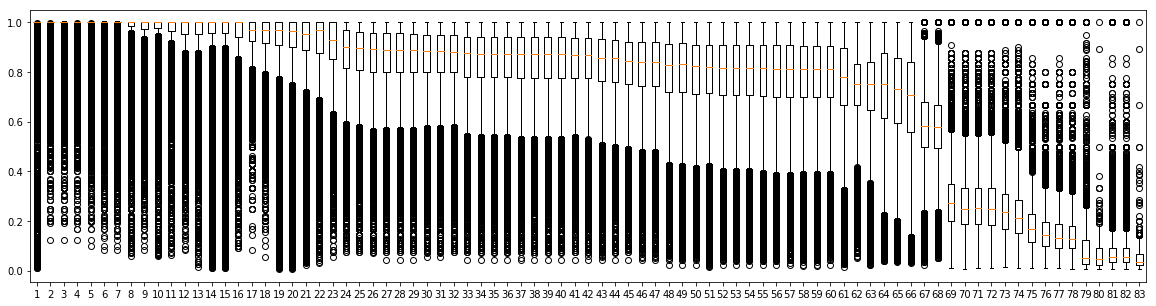

In [11]:
fig = plt.figure(figsize=(20, 5))
plt.boxplot([res_prop[k] for k, c in tmp])

plt.show()

In [12]:
tmp = sorted([(key, np.median(item)) for key, item in res_prop.items()], key = lambda x: x[1], reverse=True)

In [13]:
selected_phenotypes = set([k for k, c in tmp if c > 0.9])

In [14]:
pi = pi[pi.phenotype.apply(lambda x: x in selected_phenotypes)]

In [15]:
pi = pi[[(float(un) / float(um)) > 0.9 for un, um in zip(pi.n_snps_used, pi.n_snps_model)]]

In [16]:
id2tissue = sorted(set(pi.tissue))
id2gene = sorted(set(pi.gene))
id2phenotype = sorted(set(pi.phenotype))

tissue2id = {t:i for i, t in enumerate(id2tissue)}
phenotype2id = {t:i for i, t in enumerate(id2phenotype)}
gene2id = {t:i for i, t in enumerate(id2gene)}

In [17]:
gid2gn = {}
for g, gn in zip(pi.gene, pi.gene_name):
    if g in gid2gn:
        assert gid2gn[g] == gn
    gid2gn[g] = gn

In [25]:
tmp = pi[pi.gene.apply(lambda x: x in s0)]
len(set(tmp[np.abs(tmp.zscore) > 5.0].gene))

811

In [26]:
gene_z5 = set(tmp[np.abs(tmp.zscore) > 5.0].gene)

with open('../processed_data/model_genes_z5.txt', 'wb') as writer:
    for g in gene_z5:
        print '%s\n' % g,
        writer.writelines('%s\n' % str(g))

ENSG00000198156
ENSG00000137312
ENSG00000137310
ENSG00000204599
ENSG00000103056
ENSG00000189298
ENSG00000204592
ENSG00000176046
ENSG00000164938
ENSG00000138794
ENSG00000243477
ENSG00000096654
ENSG00000124635
ENSG00000185651
ENSG00000153406
ENSG00000138386
ENSG00000138028
ENSG00000138380
ENSG00000101442
ENSG00000204248
ENSG00000214300
ENSG00000177954
ENSG00000183431
ENSG00000109501
ENSG00000164941
ENSG00000146904
ENSG00000204084
ENSG00000213213
ENSG00000136682
ENSG00000148187
ENSG00000130204
ENSG00000130202
ENSG00000130203
ENSG00000204344
ENSG00000130208
ENSG00000173064
ENSG00000197697
ENSG00000119965
ENSG00000120738
ENSG00000168297
ENSG00000175662
ENSG00000139531
ENSG00000204560
ENSG00000068079
ENSG00000166619
ENSG00000204564
ENSG00000204444
ENSG00000204569
ENSG00000204568
ENSG00000149925
ENSG00000175793
ENSG00000149927
ENSG00000130921
ENSG00000105401
ENSG00000112137
ENSG00000092020
ENSG00000101384
ENSG00000204231
ENSG00000125347
ENSG00000166888
ENSG00000099203
ENSG00000185955
ENSG0000

In [ ]:
len(set(tmp[np.abs(tmp.zscore) > 3.0].gene))

In [ ]:
id2phenotype

In [ ]:
s1 = set(pi.gene)

s0 = set([s.split('.')[0] for s in s0])

In [ ]:
len(s1 & set([s.split('.')[0] for s in s0]))

In [ ]:
np.sum(np.abs(pi[pi.gene.apply(lambda x: x not in s0)].zscore) > 5.0)

In [ ]:
np.sum(np.abs(pi.zscore) > 5.0)

In [ ]:
model_genes = s1 & set([s.split('.')[0] for s in s0])

In [ ]:
with open('../processed_data/model_genes.txt', 'wb') as writer:
    for g in model_genes:
        writer.writelines('%s\n' % g)

In [ ]:
id2phenotype

In [ ]:
with open('../processed_data/selected_phenotypes.txt', 'wb') as writer:
    for g in id2phenotype:
        print '%s\n' % g,
        writer.writelines('%s\n' % str(g))